In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Load Dataset

In [126]:
train=pd.read_csv('IncomePredictionTrain.csv',na_values='?')
test=pd.read_csv('IncomePredictionTest.csv',na_values='?')
train.head(3)

,rowid,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
0,1,38,Private,108907,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,NaN,<=50K
1,3,58,Self-emp-not-inc,33309,HS-grad,9,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,80,United-States,<=50K
2,4,62,Private,169204,HS-grad,9,Widowed,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K


In [127]:
train['yearly_income'].value_counts(normalize=True)

<=50K    0.759185
>50K     0.240815
Name: yearly_income, dtype: float64

Data is not balanced. Majority response are  <=50K

In [128]:
print('Shape of training set:', train.shape) 
print('Shape of test set:', test.shape) 

Shape of training set: (26049, 16)
Shape of test set: (6512, 16)


In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rowid           26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       24584 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      24578 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  25563 non-null  object
 15  yearly_income   26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [130]:
#Checking percentage of missing data
round(train.isnull().sum()/len(train)*100,3)


rowid             0.000
age               0.000
workclass         5.624
fnlwgt            0.000
education         0.000
education_num     0.000
marital_status    0.000
occupation        5.647
relationship      0.000
race              0.000
sex               0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    1.866
yearly_income     0.000
dtype: float64

In [131]:
train.describe()

,rowid,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.000000,26049.000000,26049.000000
mean,16271.319590,38.589274,1.894995e+05,10.078199,1077.775423,85.858190,40.439057
std,9402.676798,13.614376,1.054885e+05,2.577200,7403.682592,400.481239,12.411520
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.177670e+05,9.000000,0.000000,0.000000,40.000000
50%,16256.000000,37.000000,1.780250e+05,10.000000,0.000000,0.000000,40.000000
75%,24432.000000,48.000000,2.368050e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [132]:
#Checking percentage of missing data
round(test.isnull().sum()/len(test)*100,3)

rowid               0.000
age                 0.000
workclass           5.697
fnlwgt              0.000
education           0.000
education_num       0.000
marital_status      0.000
occupation          5.713
relationship        0.000
race                0.000
sex                 0.000
capital_gain        0.000
capital_loss        0.000
hours_per_week      0.000
native_country      1.490
yearly_income     100.000
dtype: float64

In [133]:
#save our time on duplicating logics for train and test 
#also ensure the transformations applied on train and test are the same

full_data=pd.concat([train,test])

print ("Full Data set created.")

Full Data set created.


In [134]:
full_data.shape

(32561, 16)

# Section 1:EDA

## Identify numeric and categorical features

In [135]:
train.columns

Index(['rowid', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'yearly_income'],
      dtype='object')

In [136]:
#reformat response
full_data['yearly_income']=full_data['yearly_income'].map({'<=50K': 0, '>50K': 1})

In [137]:
numeric_feat=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
categorical_feat=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

## Numeric features

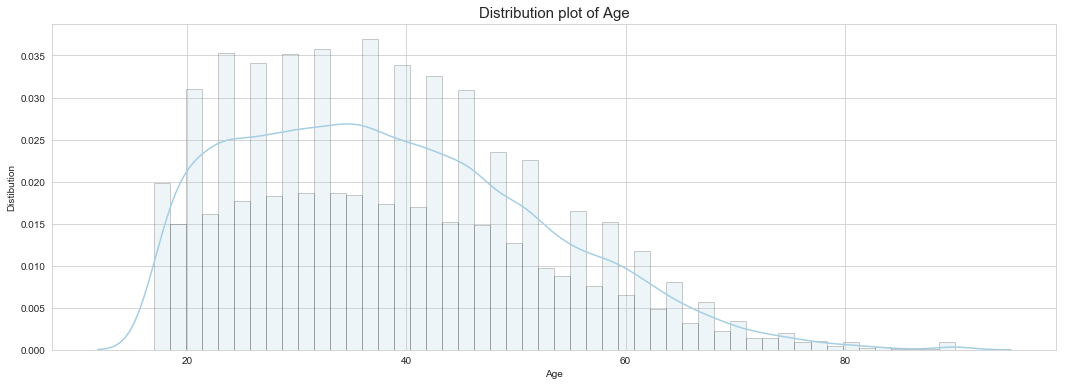

In [138]:
#Visulization on age

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))


fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(full_data['age'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('Age')
ax.set_title('Distribution plot of Age', fontsize=15)

plt.show()

In [139]:
print('Age Min :',full_data['age'].min())
print('Age Max :', full_data['age'].max())

Age Min : 17
Age Max : 90


Age is slightly skewed, with youngest of age 17 and oldest of age 90. The majority people are between 20-45 years old

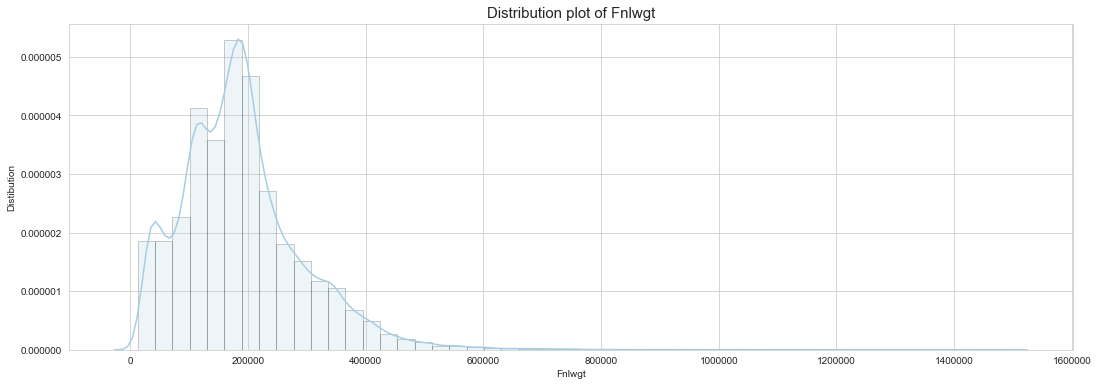

In [140]:


#Visulization of Fnlwgt
fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(full_data['fnlwgt'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('Fnlwgt')
ax.set_title('Distribution plot of Fnlwgt', fontsize=15)

plt.show()

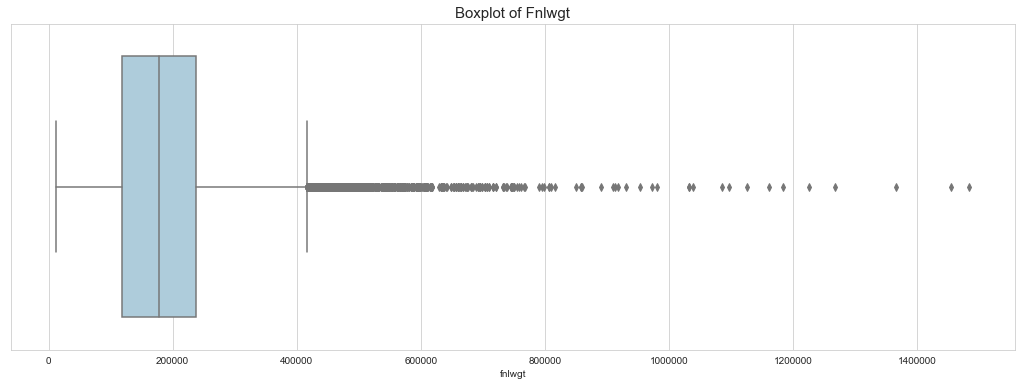

In [141]:
fig, ax=plt.subplots(figsize=(18,6))
sns.boxplot(x=full_data['fnlwgt'])
ax.set_title('Boxplot of Fnlwgt',fontsize=15)
plt.show()

The distribution is skewed, and many outliers for feature fnlwgt

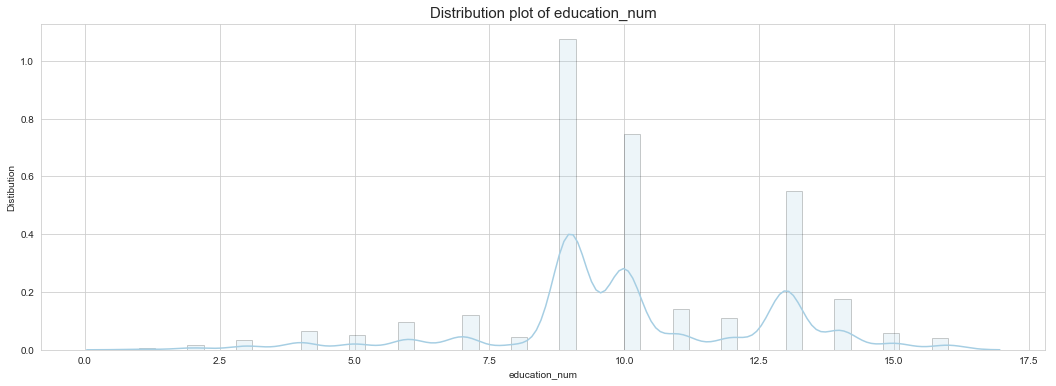

In [142]:
#Visulization of education_num
fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(full_data['education_num'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('education_num')
ax.set_title('Distribution plot of education_num', fontsize=15)

plt.show()

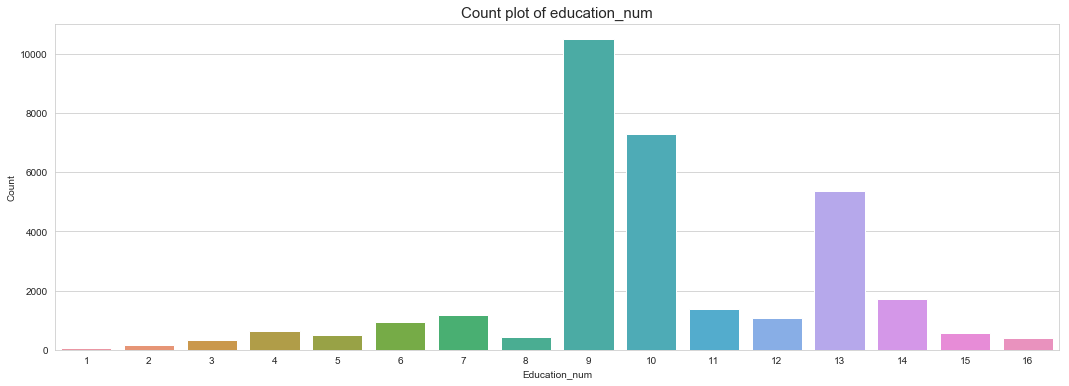

In [18]:
#Visulization of education_num
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(full_data['education_num'])
ax.set_ylabel('Count')
ax.set_xlabel('Education_num')
ax.set_title('Count plot of education_num', fontsize=15)

plt.show()

In [19]:
full_data['education_num'].mean()

10.0806793403151

* There are three peaks in the distribution plot at 9,10 and 13 years.
* Majority of people in the data have at least 9 years of education, and the average number of years education is around 10 years

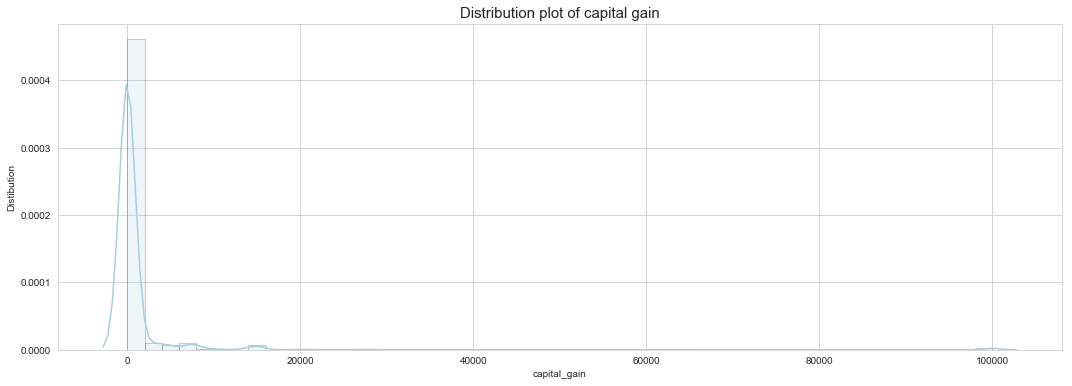

In [20]:
#Visulization of capital_gain
fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(full_data['capital_gain'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('capital_gain')
ax.set_title('Distribution plot of capital gain', fontsize=15)

plt.show()

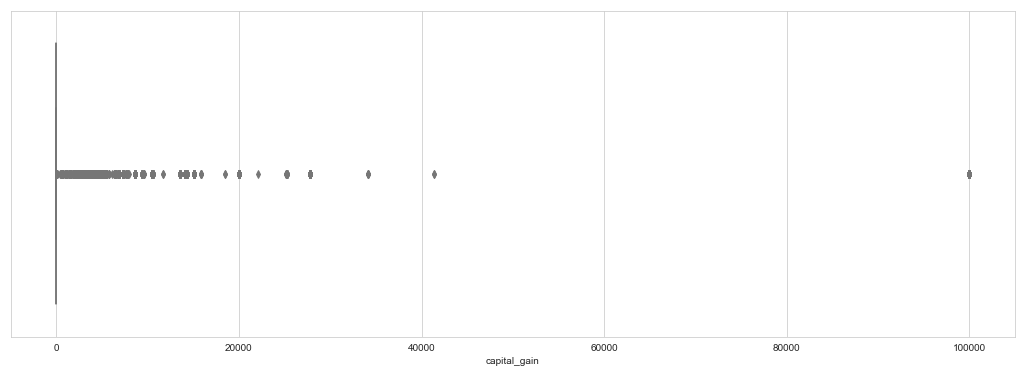

In [21]:
fig, ax=plt.subplots(figsize=(18,6))
sns.boxplot(x=full_data['capital_gain'])

plt.show()

* Feeature capital gain is highly right skewed with long tail. 
* There are very far away outliers, but majority people have capital gain less than 1000

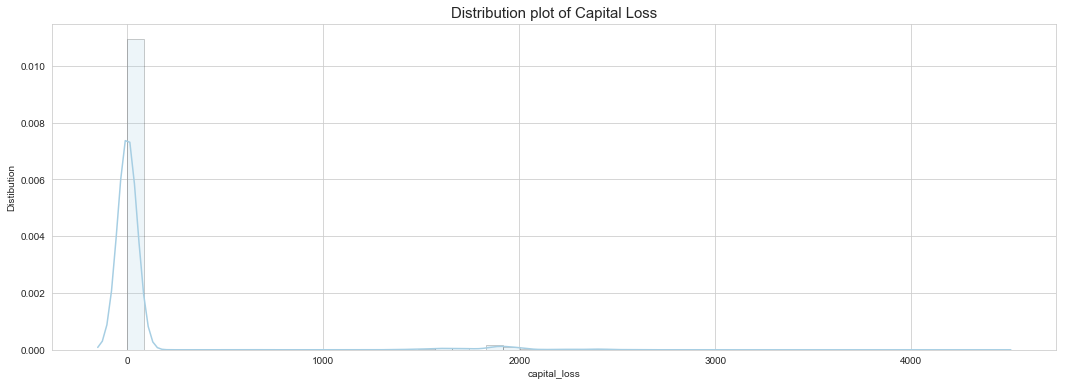

In [22]:
#Visulization of capital_loss
fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(full_data['capital_loss'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('capital_loss')
ax.set_title('Distribution plot of Capital Loss', fontsize=15)

plt.show()

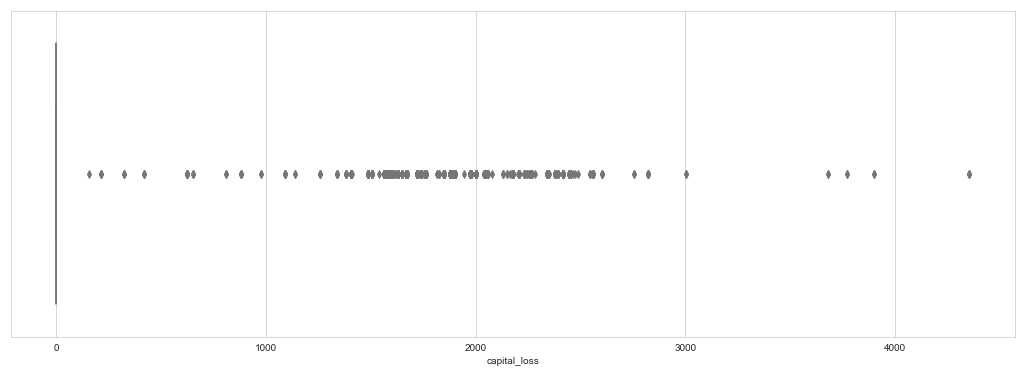

In [23]:
fig, ax=plt.subplots(figsize=(18,6))
sns.boxplot(x=full_data['capital_loss'])

plt.show()

* Data is highly skewed.
* Majoriy of people has 0 capital loss but there is a small peak around 2000 dollars

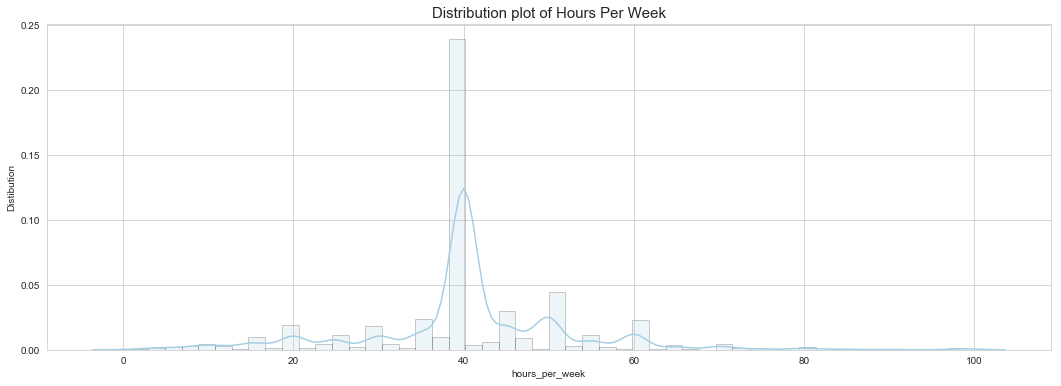

In [24]:
#Visulization of hours_per_week
fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(full_data['hours_per_week'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('hours_per_week')
ax.set_title('Distribution plot of Hours Per Week', fontsize=15)

plt.show()

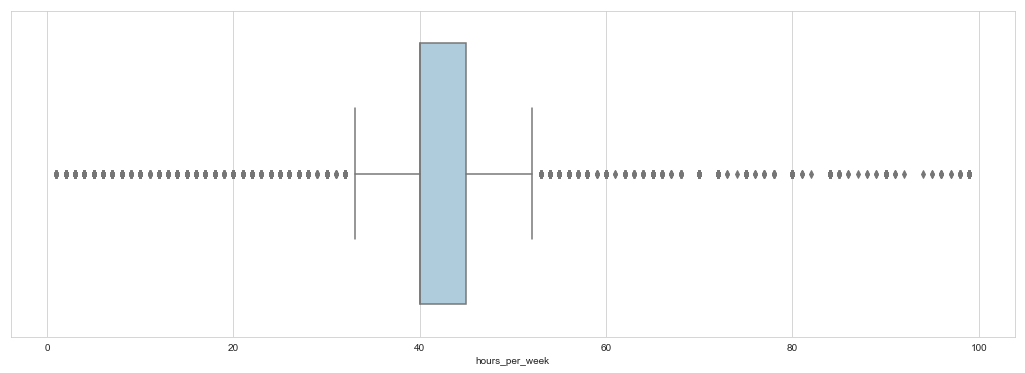

In [25]:
fig, ax=plt.subplots(figsize=(18,6))
sns.boxplot(x=full_data['hours_per_week'])

plt.show()

In [26]:
print('Max hours per week:',full_data['hours_per_week'].max())
print('Min hours per week:',full_data['hours_per_week'].min())

Max hours per week: 99
Min hours per week: 1


* Most people work 40 hours per week, data is slightly skewed
* There are outliers on both side with minimum of 1 hour per week and maximum of 99 hours per week

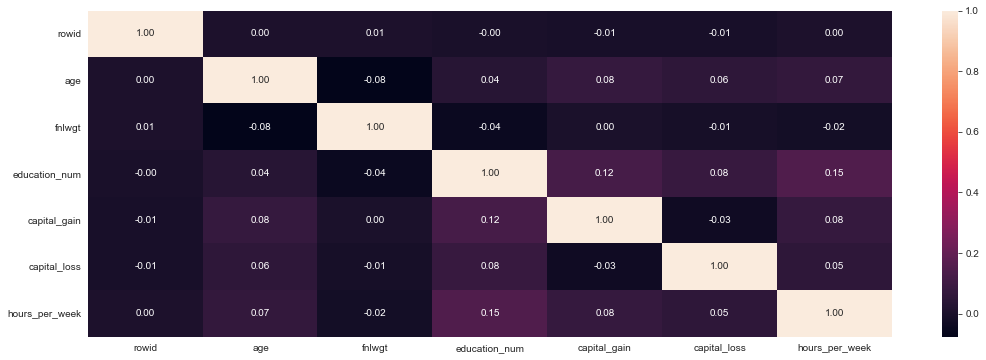

In [27]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.heatmap(full_data.iloc[:,0:15].corr(), annot=True, fmt='.2f')
plt.show()

All the numeric independent variables seem have very small correlations with each other

* education_num, hours_per_week, age are OK, since the skewness almost below 0.5
* however, fnwgt, capital_loss and capital_gain are all very skewed and transformations are needed for those three

## Categorical features

In [28]:
#checking number of classes for different categorical features
for i in range(0,len(categorical_feat)):
    if categorical_feat[i] in('workclass','occupation','native_country'):
        number_unique=len(train[categorical_feat[i]].unique())-1
    else:
        number_unique=len(train[categorical_feat[i]].unique())
    
    print(categorical_feat[i], '\t', number_unique)

workclass 	 8
education 	 16
marital_status 	 7
occupation 	 14
relationship 	 6
race 	 5
sex 	 2
native_country 	 41


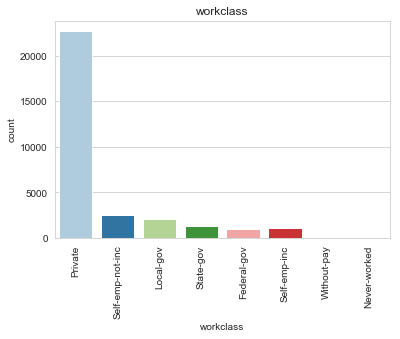

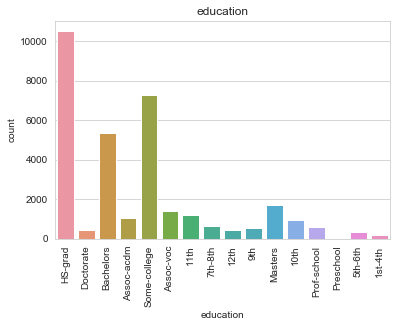

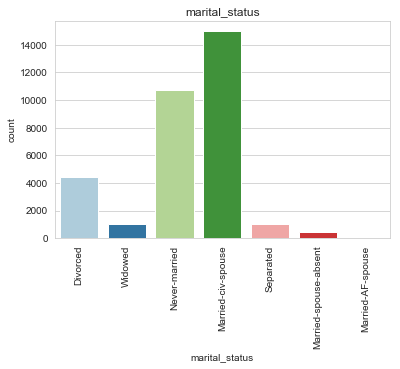

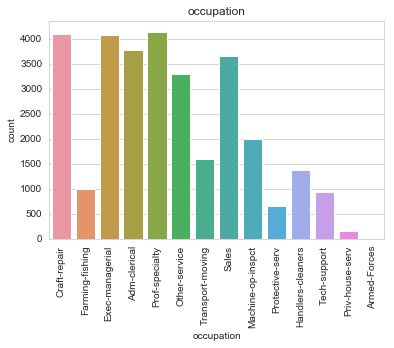

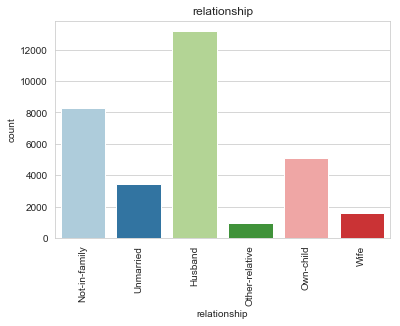

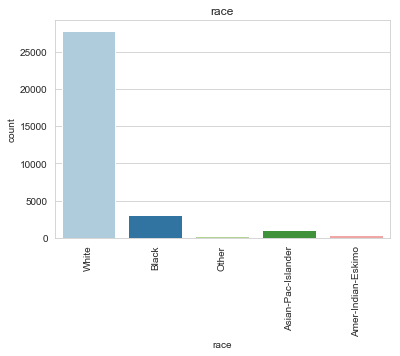

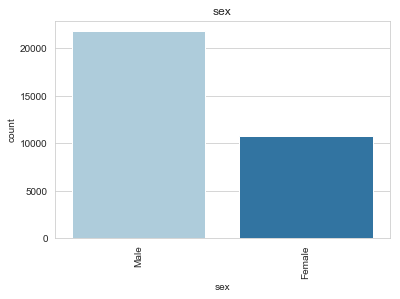

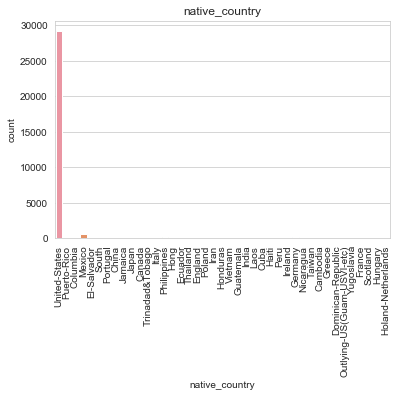

In [29]:
for i in categorical_feat:
  plt.title(i)
  sns.countplot(x=full_data[i])
  plt.xticks(rotation=90)
  plt.show()

In [30]:
full_data['occupation'].value_counts()/len(train)

Prof-specialty       0.158931
Craft-repair         0.157357
Exec-managerial      0.156090
Adm-clerical         0.144727
Sales                0.140121
Other-service        0.126492
Machine-op-inspct    0.076855
Transport-moving     0.061308
Handlers-cleaners    0.052593
Farming-fishing      0.038159
Tech-support         0.035625
Protective-serv      0.024915
Priv-house-serv      0.005720
Armed-Forces         0.000346
Name: occupation, dtype: float64

Based on the count graphs
* Private has the highest counts in workclass feature
* United States has the highest counts is native_country 
* Prof-specialty has the highest counts in occupation

Imputation will be applied based on mode of each feature

### Missing values imputation

In [31]:
full_data['workclass']=full_data['workclass'].fillna('Private')
full_data['native_country']=full_data['native_country'].fillna('United-States')
full_data['occupation']=full_data['occupation'].fillna('Prof-specialty')


In [32]:
#checking missing values again
full_data.isnull().sum()

rowid                0
age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
yearly_income     6512
dtype: int64

Summary
1. for numeric featrues, transformations are needed due to the skewness and differnece in range for different features
2. for categorical feature,they also need to be transformed to numbers using label coding

# Section 2: Table Generating

In [33]:
full_data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [34]:
full_data['age_group']=pd.cut(full_data['age'],bins=[10,20,30,40,50,60,70,80,90])

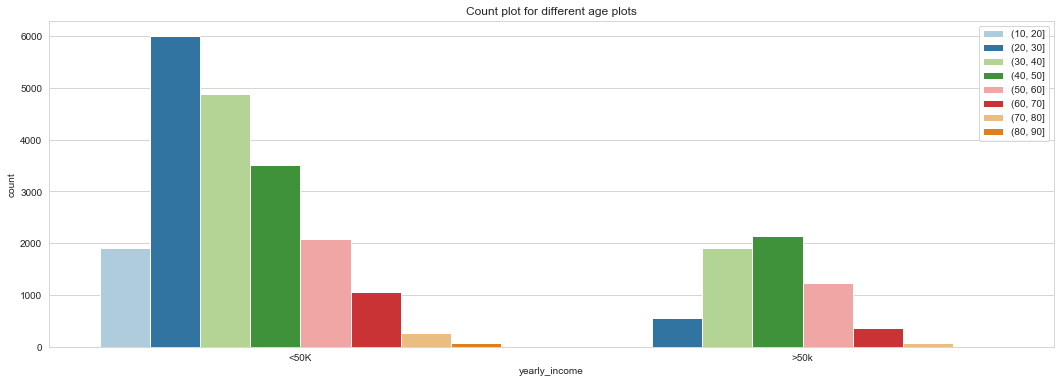

In [35]:
fig, ax=plt.subplots(figsize=(18,6))

sns.countplot(x='yearly_income',hue='age_group',data=full_data)
ax.legend(loc='upper right')
ax.set_xticklabels(['<50K','>50k'])
ax.set_title('Count plot for different age plots')
plt.show()

## The mean of hours-per-week for different age ranges

In [36]:
grouped_hr=full_data[['age_group','hours_per_week']].groupby('age_group').mean().reset_index()

In [37]:
grouped_hr

,age_group,hours_per_week
0,"(10, 20]",28.565145
1,"(20, 30]",39.570938
2,"(30, 40]",43.272525
3,"(40, 50]",43.382787
4,"(50, 60]",42.363857
5,"(60, 70]",35.061942
6,"(70, 80]",26.031746
7,"(80, 90]",29.555556


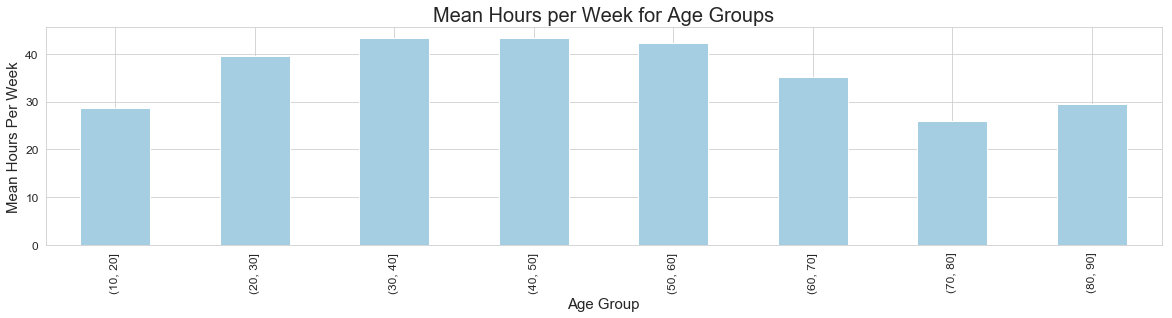

In [38]:
plt.rcParams["figure.figsize"] = (20,4)
grouped_hr.plot.bar(x='age_group',y='hours_per_week',legend=None)
plt.title('Mean Hours per Week for Age Groups',fontsize=20)
plt.xlabel('Age Group',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Mean Hours Per Week', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

* Young people before 20 years old and old people after 60 years old tend to work less
* Middle age people 30-60 work longer about 39-42 hours per week

## The median of education level for different age ranges

In [39]:
grouped_ed=full_data[['age_group','education_num']].groupby('age_group').median().reset_index()

In [40]:
grouped_ed

,age_group,education_num
0,"(10, 20]",9
1,"(20, 30]",10
2,"(30, 40]",10
3,"(40, 50]",10
4,"(50, 60]",9
5,"(60, 70]",9
6,"(70, 80]",9
7,"(80, 90]",9


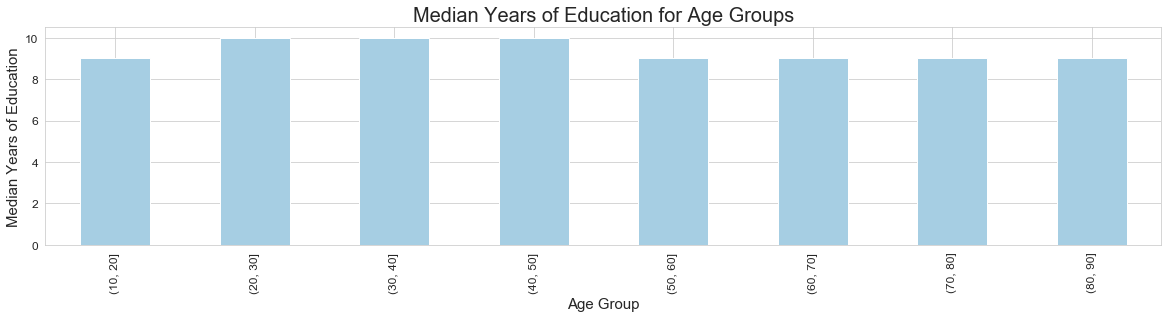

In [41]:
plt.rcParams["figure.figsize"] = (20,4)
grouped_ed.plot.bar(x='age_group',y='education_num',legend=None)
plt.title('Median Years of Education for Age Groups',fontsize=20)
plt.xlabel('Age Group',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Median Years of Education', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

For different ages for people, we don't see a big difference in years of education

## The median age for males and females by occupation

In [42]:
full_data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [43]:
grouped_female=full_data[full_data['sex']=='Female'][['age','occupation']].groupby('occupation').median().reset_index()
grouped_male=full_data[full_data['sex']=='Male'][['age','occupation']].groupby('occupation').median().reset_index()

In [44]:
grouped_both=pd.merge(grouped_female,grouped_male,on='occupation')

In [45]:
grouped_both.rename(columns={'age_x':'Female_Age','age_y':'Male_Age'},inplace=True)

In [46]:
grouped_both

,occupation,Female_Age,Male_Age
0,Adm-clerical,35,36
1,Craft-repair,39,38
2,Exec-managerial,39,42
3,Farming-fishing,39,39
4,Handlers-cleaners,32,28
5,Machine-op-inspct,37,36
6,Other-service,33,31
7,Priv-house-serv,41,23
8,Prof-specialty,36,41
9,Protective-serv,33,37


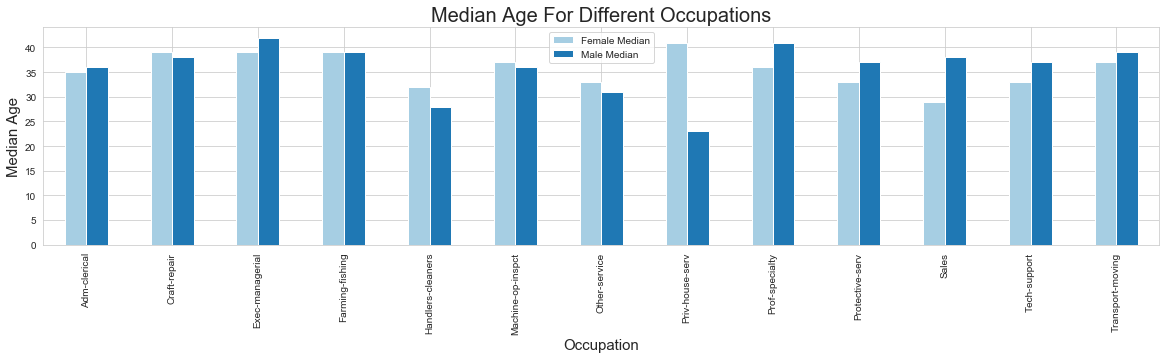

In [47]:
plt.rcParams["figure.figsize"] = (20,4)
grouped_both.plot.bar(x='occupation',y=['Female_Age','Male_Age'])
plt.title('Median Age For Different Occupations',fontsize=20)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Median Age', fontsize=15)
plt.legend(loc='best',labels=['Female Median','Male Median'])

plt.show()

# Section 3: Model 

In [48]:
full_data=full_data.drop('age_group',axis=1)

## Numeric features

We will apply two preprocessings on numeric features:

1. Apply box-cox transformations for skewed numeric features.

2. Scale numeric features so they will fall in the range between 0 and 1.



In [49]:
from scipy.stats import skew, boxcox
skewed_cols = full_data[numeric_feat].apply(lambda x: skew(x.dropna()))
print (skewed_cols.sort_values())

education_num     -0.311662
hours_per_week     0.227632
age                0.558718
fnlwgt             1.446913
capital_loss       4.594417
capital_gain      11.953297
dtype: float64


### Apply boxcox transformation

In [50]:
skewed_cols = skewed_cols[skewed_cols > 0.5].index.values

In [51]:
skewed_cols

array(['age', 'fnlwgt', 'capital_gain', 'capital_loss'], dtype=object)

In [52]:
for skewed_col in skewed_cols:
    full_data[skewed_col], lam = boxcox(full_data[skewed_col]+1)

### Apply Standard Scaling

In [53]:
from sklearn import preprocessing

In [54]:
scaler=preprocessing.StandardScaler()

In [55]:
full_data[numeric_feat]=scaler.fit_transform(full_data[numeric_feat])

In [56]:
full_data.head()

,rowid,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
0,1,0.102709,Private,-0.728707,HS-grad,-0.420060,Divorced,Craft-repair,Not-in-family,White,Male,-0.301425,-0.22121,-0.035429,United-States,0.0
1,3,1.334574,Self-emp-not-inc,-2.059072,HS-grad,-0.420060,Widowed,Farming-fishing,Not-in-family,White,Male,-0.301425,-0.22121,3.204161,United-States,0.0
2,4,1.537116,Private,-0.038963,HS-grad,-0.420060,Widowed,Craft-repair,Unmarried,White,Male,-0.301425,-0.22121,-0.035429,United-States,0.0
3,5,1.064392,Private,-1.100036,Doctorate,2.300838,Divorced,Exec-managerial,Not-in-family,White,Female,-0.301425,-0.22121,1.179417,United-States,1.0
4,6,0.247369,Local-gov,0.555616,HS-grad,-0.420060,Never-married,Adm-clerical,Unmarried,Black,Female,-0.301425,-0.22121,-0.440378,United-States,0.0


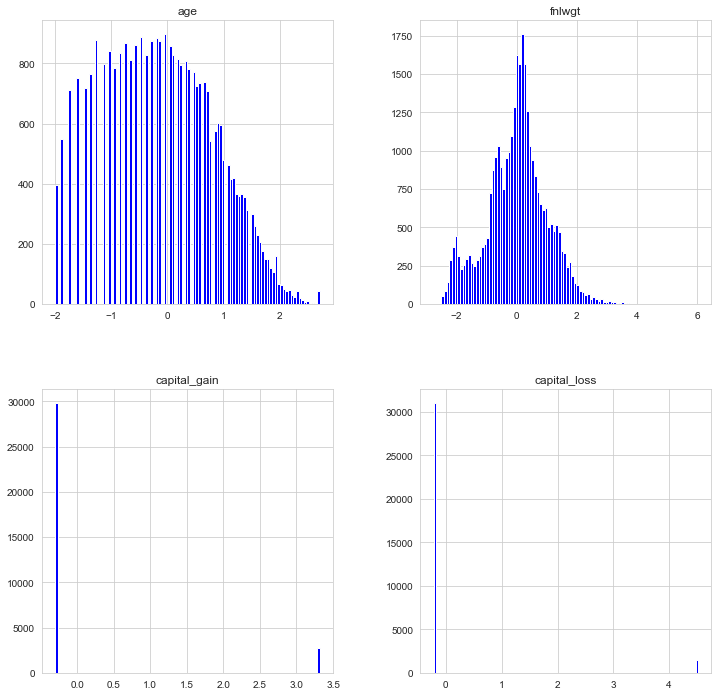

In [57]:
#checking distribution after transformation
plt.rcParams['figure.figsize'] = 12, 12
full_data[skewed_cols].hist(color='b', bins=100)
plt.show()

* The distribuiton for age and fnlwgt looks better
* Capital_gain and capital_loss still look skewed

## categorical features

In [58]:
from sklearn import preprocessing
import time

### Label encoding

In [59]:
LBL = preprocessing.LabelEncoder()
start=time.time()
for cat_col in categorical_feat:
#     print ("Factorize feature %s" % (cat))
    full_data[cat_col] = LBL.fit_transform(full_data[cat_col])
print ('Label enconding finished in %f seconds' % (time.time()-start))

Label enconding finished in 0.157964 seconds


* There are multiples ways to deal with categorical data, due to time constriant I only use label encoding
* One hot encoding and leave-one-out encoding can also be performed and combined seperately with numeric features to tune models for better performance


In [60]:
#ID is irrelevant so drop this column
full_data=full_data.drop('rowid',axis=1)

In [61]:
full_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
0,0.102709,3,-0.728707,11,-0.420060,0,2,1,4,1,-0.301425,-0.22121,-0.035429,38,0.0
1,1.334574,5,-2.059072,11,-0.420060,6,4,1,4,1,-0.301425,-0.22121,3.204161,38,0.0
2,1.537116,3,-0.038963,11,-0.420060,6,2,4,4,1,-0.301425,-0.22121,-0.035429,38,0.0
3,1.064392,3,-1.100036,10,2.300838,0,3,1,4,0,-0.301425,-0.22121,1.179417,38,1.0
4,0.247369,1,0.555616,11,-0.420060,4,0,4,2,0,-0.301425,-0.22121,-0.440378,38,0.0


In [62]:
new_train=full_data.dropna()

In [63]:
new_train.shape

(26049, 15)

In [64]:
new_test=full_data[full_data['yearly_income'].isnull()]

In [65]:
new_test.shape

(6512, 15)

* Without knowing the label for test data is hard to justify which KNN fits best for the data 
* Here, I decide to seperate the transformed new training set to train and test to get an idea of model performance 


In [66]:
x=new_train.drop('yearly_income',axis=1)
y=new_train['yearly_income']

## KNN classifier

* For KNN classifier, I will try with three different distance metrics, three weights, and 8 neighbours. 
* I will use accuracy to evaluate the performance


In [67]:
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=123)

In [68]:
def squared_inverse(x):
    return(1/x**2)

In [69]:
def linear_weight(x):
        k=x.shape[1]
        x=x.transpose()
        weights=((x[k-1,:]-x)/(x[k-1,:]-x[0,:])).transpose()
        return weights

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
pipeline=Pipeline([
    ('knn',KNeighborsClassifier())
])

In [72]:
parameters={
    'knn__metric':('cityblock', 'cosine', 'euclidean'),
    'knn__weights':('distance',linear_weight,squared_inverse),
    'knn__n_neighbors':(8,9,10,11,12,13,14,15)
    
}

In [73]:
grid_search=GridSearchCV(pipeline, parameters,n_jobs=3, verbose=1,scoring='accuracy')

In [74]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 216 out of 216 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'knn__metric': ('cityblock', 'cosine', 'euclidean'), 'knn__weights': ('distance', <function linear_weight at 0x7fe128de3d08>, <function squared_inverse at 0x7fe128de3c80>), 'knn__n_neighbors': (8, 9, 10, 11, 12, 13, 14, 15)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [75]:
#best parameters
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, best_parameters[param_name])

knn__metric cityblock
knn__n_neighbors 14
knn__weights distance


In [76]:
knn_best_accuracy=grid_search.best_score_

In [77]:
print("Best Accuracy Score for KNN : {0:.2%}".format(knn_best_accuracy))

Best Accuracy Score for KNN : 82.87%


## Logistic Regression

In [78]:


from sklearn.linear_model import LogisticRegression

In [82]:

start=time.time()
lg_reg=LogisticRegression()
lg_reg.fit(x_train,y_train)
y_pred=lg_reg.predict(x_test)
acc_lg=accuracy_score(y_test,y_pred)
end=time.time()
print('total time used:',end-start)
print("Best Accuracy Score for Logistic Regression: {0:.2%}".format(acc_lg))

total time used: 0.10015487670898438
Best Accuracy Score for Logistic Regression: 82.01%


## SVM

In [83]:
from sklearn import svm

In [84]:

acc_svm=[] 
start=time.time()
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(C=c,kernel='linear')
    SVM.fit(x_train,y_train)
    y_pred=SVM.predict(x_test)
    acc_svm.append(accuracy_score(y_test,y_pred))
print(acc_svm)
end=time.time()
print('total time used:',end-start)

[0.8157531091662829, 0.8160601873176724, 0.8162137263933671, 0.8159066482419776, 0.8160601873176724, 0.8160601873176724, 0.8160601873176724, 0.8159066482419776, 0.8159066482419776, 0.8160601873176724, 0.8159066482419776]
total time used: 215.06799006462097


In [85]:
acc_svm_rbf=[] 
start=time.time()
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(C=c,kernel='rbf')
    SVM.fit(x_train,y_train)
    y_pred=SVM.predict(x_test)
    acc_svm_rbf.append(accuracy_score(y_test,y_pred))
print(acc_svm_rbf)
end=time.time()
print('total time used:',end-start)

[0.7822815906648242, 0.810379241516966, 0.8248119146322739, 0.8295716259788116, 0.8340242591739597, 0.8369415016121603, 0.8392445877475817, 0.8367879625364655, 0.8324888684170121, 0.831874712114233, 0.8294180869031168]
total time used: 68.03456497192383


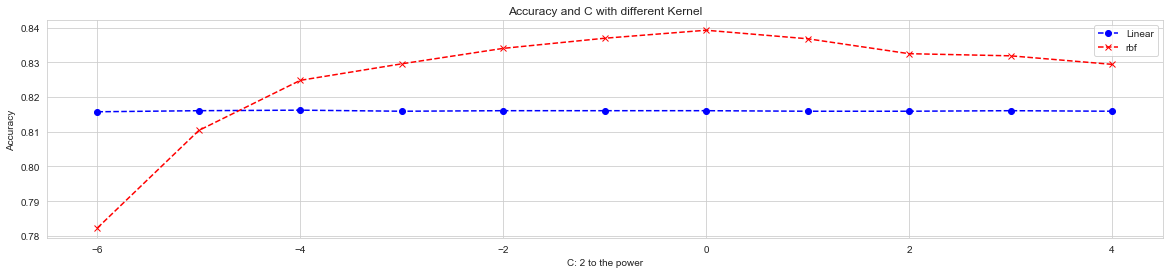

In [88]:

from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (20,4))
#ax = fig.add_subplot(1,1,1),
 



svm_linear,=plt.plot(range(-6,5), acc_svm,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
svm_rbf, =plt.plot(range(-6,5), acc_svm_rbf,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
#svm_poly,=plt.plot(range(-6,5), acc_svm_rbf,color='black',linestyle='dashed',marker='*',
        #markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Accuracy and C with different Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Accuracy')
plt.legend([svm_linear,svm_rbf],['Linear','rbf'])
plt.show()

In [89]:
svm_acc_best=max(acc_svm_rbf)

In [91]:

print("Best Accuracy Score for SVM with Linear Kernel: {0:.2%}".format(svm_acc_best))

Best Accuracy Score for SVM with Linear Kernel: 83.92%


## Random Forest

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [93]:
pipeline=Pipeline([
    ('rf',RandomForestClassifier())
])

In [94]:
parameters={
    'rf__n_estimators':(100,150,200,250,300),
    'rf__max_depth':(5,10,15,20),
    'rf__max_features':('auto','log2','sqrt'),
    'rf__criterion':['gini','entropy']
    
}

In [95]:
grid_search=GridSearchCV(pipeline, parameters,n_jobs=3, verbose=1,scoring='accuracy')

In [96]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.7s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'rf__n_estimators': (100, 150, 200, 250, 300), 'rf__max_depth': (5, 10, 15, 20), 'rf__max_features': ('auto', 'log2', 'sqrt'), 'rf__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [97]:
#best parameters
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, best_parameters[param_name])

rf__criterion gini
rf__max_depth 15
rf__max_features log2
rf__n_estimators 100


In [98]:
rf_best_acc=grid_search.best_score_

##  Model comparision

In [101]:
comp=pd.DataFrame({'Methods':['KNN','Logistic Regression','SVM','Random Forest'],
                  'Accuracy':[knn_best_accuracy,acc_lg,svm_acc_best,rf_best_acc]})

In [103]:
comp['Accuracy'] = comp['Accuracy'].map("{:.2%}".format)

In [104]:
comp

,Methods,Accuracy
0,KNN,82.87%
1,Logistic Regression,82.01%
2,SVM,83.92%
3,Random Forest,85.73%


Therefore, Random Forest gives the best accuracy among all the models I tried.


# Fitting test dataset with the best performance model

In [107]:
new_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
0,1.007833,3,0.247565,14,1.912138,0,3,1,4,1,-0.301425,4.520599,1.584366,38,NaN
1,0.832567,3,0.025371,12,1.523438,2,9,0,4,1,-0.301425,-0.221210,-0.035429,38,NaN
2,-0.372473,3,0.916451,9,1.134739,0,11,1,4,1,-0.301425,-0.221210,0.369519,38,NaN
3,0.950364,3,1.120016,11,-0.420060,0,2,1,4,1,-0.301425,-0.221210,-0.035429,38,NaN
4,-0.638129,3,-0.035520,8,0.357340,4,12,1,4,1,-0.301425,-0.221210,-0.035429,38,NaN


In [108]:
new_test=new_test.drop('yearly_income',axis=1)

After testing model performance with just training set(split into train and test), now I will use the whole training set to train the model

In [110]:
new_train_x=new_train.drop('yearly_income',axis=1)
new_train_y=new_train['yearly_income']

In [149]:
rf=RandomForestClassifier(n_estimators=100,max_depth=15,criterion='gini',max_features='log2')
rf.fit(new_train_x,new_train_y)
y_pred=rf.predict(new_test)

In [150]:
y_pred

array([1., 1., 0., ..., 0., 0., 0.])

In [151]:
pd.value_counts(y_pred)

0.0    5282
1.0    1230
dtype: int64

In [152]:
new_test['yearly_income']=y_pred

In [125]:
#y_pred=pd.Series(y_pred).map({0: '<=50K', 1: '>50K'})
#y_pred.to_csv('result.csv',index=False)

In [145]:
#test['yearly_income']=y_pred

In [154]:
new_test.to_csv('test_with_label.csv',index=False)

Conclusion:

* I built KNN from scratch first and then tested different classification methonds to compare. The best performance is given by Random Forest with around 85.73% accuracy
* Here, due to time contraints I only use accuracy to test model performance. If given test label, I can use more metrics like AUC or classification report to evalueate
* There are also other methods that can be tried, for example, XGboost, lightGBM and combine with different categorical data encoding to get even better performance


